In [1]:
import torch
import torchvision
from torchvision import transforms, datasets


train_batch_size=64
test_batch_size=1000
epochs =3
lr=0.01
momentum = 0.5
no_cuda = False
seed = 1
log_interval = 1000
save_model = True
random_seed = 1
device = torch.device("cuda")
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)


train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

examples = enumerate(testset)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([10, 1, 28, 28])

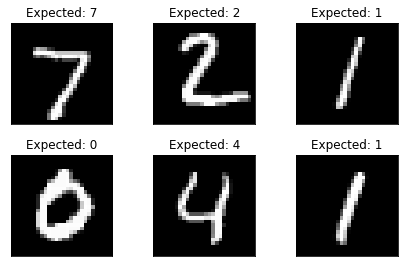

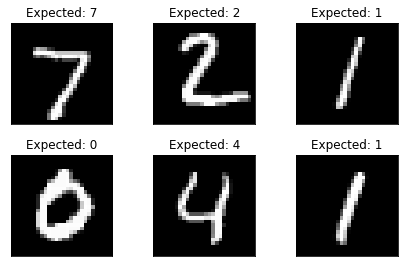

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Expected: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [4]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr,
                      momentum=momentum)

In [7]:
def train(model, device, trainset, optimizer, epoch,log_interval):
    model.train()
    avg_loss = 0
    # in training loop:
    for batch_idx, (data, target) in enumerate(trainset):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() # zero the gradient buffers
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step() # Does the update
        avg_loss+=F.nll_loss(output, target, reduction='sum').item()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(trainset.dataset),
                100. * batch_idx / len(trainset), loss.item()))
    avg_loss/=len(trainset.dataset)
    return avg_loss

def test(model, device, testset):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testset:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            X.append(data)
            predictions.append(pred)
    test_loss /= len(testset.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testset.dataset),
        100. * correct / len(testset.dataset)))
    accuracy = 100. * correct / len(testset.dataset)
    return test_loss,accuracy




In [8]:
predictions = []
train_losses = []
test_losses = []
accuracy_list = []
X =[]
for epoch in range(1, epochs + 1):
    trn_loss = train(model, device, trainset, optimizer, epoch,log_interval)
    test_loss,accuracy = test(model, device, testset)
    train_losses.append(trn_loss)
    test_losses.append(test_loss)
    accuracy_list.append(accuracy)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.155760
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.169179
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.006613
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.102368
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.021755
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.184585

Test set: Average loss: 0.0799, Accuracy: 9752/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.057008
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.012454
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.487209
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.176064
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.131876
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.267380

Test set: Average loss: 0.0654, Accuracy: 9788/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.096782
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.032062
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.132339
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.080232
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.007738
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.

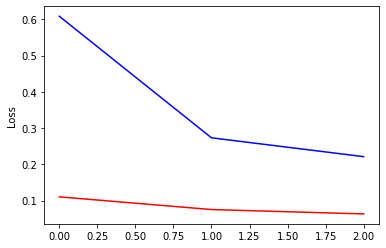

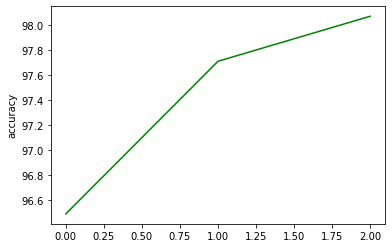

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses,'b')
plt.plot(test_losses,'r')
plt.ylabel('Loss')
plt.show()
plt.plot(accuracy_list,'g')
plt.ylabel('accuracy')
plt.show()